In [1]:
library(tidyverse)
library(tidymodels)
#library(dplyr)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [38]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
hungary <- read_delim("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/hungarian.data", col_names = FALSE, na = c("?", "-9"))
long_beach <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/long_beach.data", col_names = FALSE, na = c("?"))
#hungary
#switzerland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = F

In [52]:
cleveland_select <- cleveland |>
    select(X1, X2, X5, X4, X8, X10, X14)
switzerland_select <- switzerland |>
    select(X1, X2, X5, X4, X8, X10, X14)
hungary_select <- hungary |>
    select(X1, X2, X5, X4, X8, X10, X14)
long_beach_select <- long_beach |>
    select(X1, X2, X5, X4, X8, X10, X14)
column_names <- c("age", "sex", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate", "old_peak", "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names
colnames(hungary_select) <- column_names
colnames(long_beach_select) <- column_names


all_places <- rbind(cleveland_select, switzerland_select) |>
    rbind(hungary_select) |>
    rbind(long_beach_select)
all_places$heart_disease_present[all_places$heart_disease_present >= 1] <- "Yes"
all_places$heart_disease_present[all_places$heart_disease_present == 0] <- "No"
all_places$serum_cholesterol[all_places$serum_cholesterol == 0] <- NA
all_places_select <- mutate(all_places, sex = as_factor(sex), heart_disease_present = as_factor(heart_disease_present))
all_places_cleaned <- all_places_select |>
    filter(max_heart_rate != "NA") |>
    filter(old_peak != "NA") |>
    filter(resting_blood_pressure != "NA")


#hungary_select

In [60]:
set.seed(77777) 
places_split <- initial_split(all_places_cleaned, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 



In [61]:
avg <-  places_training |>
    select(serum_cholesterol, resting_blood_pressure) |>
    map_df(mean, na.rm = TRUE) |>
    mutate(serum_cholesterol_avg = serum_cholesterol, resting_bp_avg = resting_blood_pressure) |>
    select(serum_cholesterol_avg, resting_bp_avg)

count0 <- places_training |>
    filter(heart_disease_present == "No") |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == "Yes") |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)
countM <- places_training |>
    filter(sex == 1) |>
    count() |>
    pull()
countF <- places_training |>
    filter(sex == 0) |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_females = countF, num_males = countM)
#cleveland_training
avg
#count

serum_cholesterol_avg,resting_bp_avg,num_people_no_disease,num_people_w_disease,num_females,num_males
<dbl>,<dbl>,<int>,<int>,<int>,<int>
245.6528,132.8091,291,348,140,499


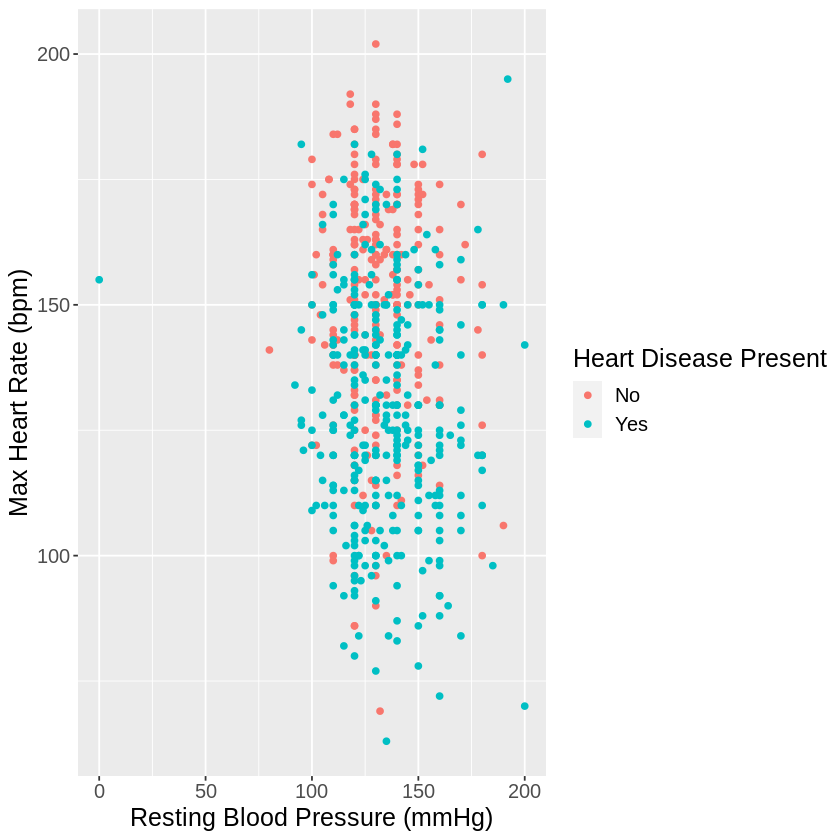

In [62]:
#all_places
#cleveland <- mutate(cleveland, X14 = as_factor(X14))
distribution_plot <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot

In [63]:
#places_training
#heart_train_scaled <- places_training |>
    #mutate(across(where(is.numeric), scale))
#heart_train_scaled 
heart_recipe <- recipe(heart_disease_present ~ max_heart_rate + old_peak + age, data = places_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

In [64]:
ks <- tibble(neighbors = 1:15)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 
#knn_spec

In [65]:
set.seed(778)
heart_vfold <- vfold_cv(places_training, v = 10, strata = heart_disease_present)

In [66]:
heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = ks)


In [67]:
collect_metrics(heart_fit)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6555132,10,0.02580491,Preprocessor1_Model01
1,roc_auc,binary,0.6536130,10,0.02629798,Preprocessor1_Model01
2,accuracy,binary,0.6555132,10,0.02569957,Preprocessor1_Model02
2,roc_auc,binary,0.7109287,10,0.02901575,Preprocessor1_Model02
3,accuracy,binary,0.6977812,10,0.02878723,Preprocessor1_Model03
3,roc_auc,binary,0.7258019,10,0.03197070,Preprocessor1_Model03
4,accuracy,binary,0.7009310,10,0.02811098,Preprocessor1_Model04
4,roc_auc,binary,0.7368113,10,0.02926563,Preprocessor1_Model04
5,accuracy,binary,0.6947779,10,0.02330932,Preprocessor1_Model05


In [69]:
#heart_fit
#summary(places_training)